In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib
from matplotlib import patheffects

import seaborn as sns

_30k_main = {
    "blue": "#202F66",
    "orange": "#FF7048",
    "purple": "#8B87EA",
    "pink": "#D869AB",
    "cyan": "#54C9B9",
    "yellow": "#F3D36E",
}

_30k_danger_safe = {
    "danger": "#FF4F72",
    "safe": "#58EDB9",
}

_30k_text = {
    "text_black": "#32363A",
    "text_lighter1": "#6F7273",
    "text_lighter2": "#8B8E8F",
    "grey1": "#aeb7bc",
    "grey2": "#c3cace",
    "grey3": "#d9dde0",
    "bg_cream": "#FAF7F4"
}

_font_mono = "Inconsolata"
_font_serif = "Canela Text"
_font_sans = "Gill Sans"

plt.style.use("./utils/-30k.mplstyle")

_30k = list(_30k_main.values())
sns.set_palette(_30k)

# ← → ↓ ↑


def _30k_path_effects(linewidth=2.5, foreground=_30k_text['bg_cream'], alpha=1.0, **kwargs):
    return [patheffects.withStroke(linewidth=linewidth, foreground=foreground, alpha=alpha, **kwargs)]

import warnings

warnings.filterwarnings('ignore')

In [2]:
from collatz_conjecture import collatz_with_history as collatz

In [3]:
to_n = 10000

hist = collatz(to_n)

In [4]:
steps = []
largest = []
for k in hist.keys():
    steps.append(len(hist[k]))
    largest.append(max(hist[k]))
longest_step_num = np.argmax(steps) + 1
reach_largest_num = np.argmax(largest) + 1

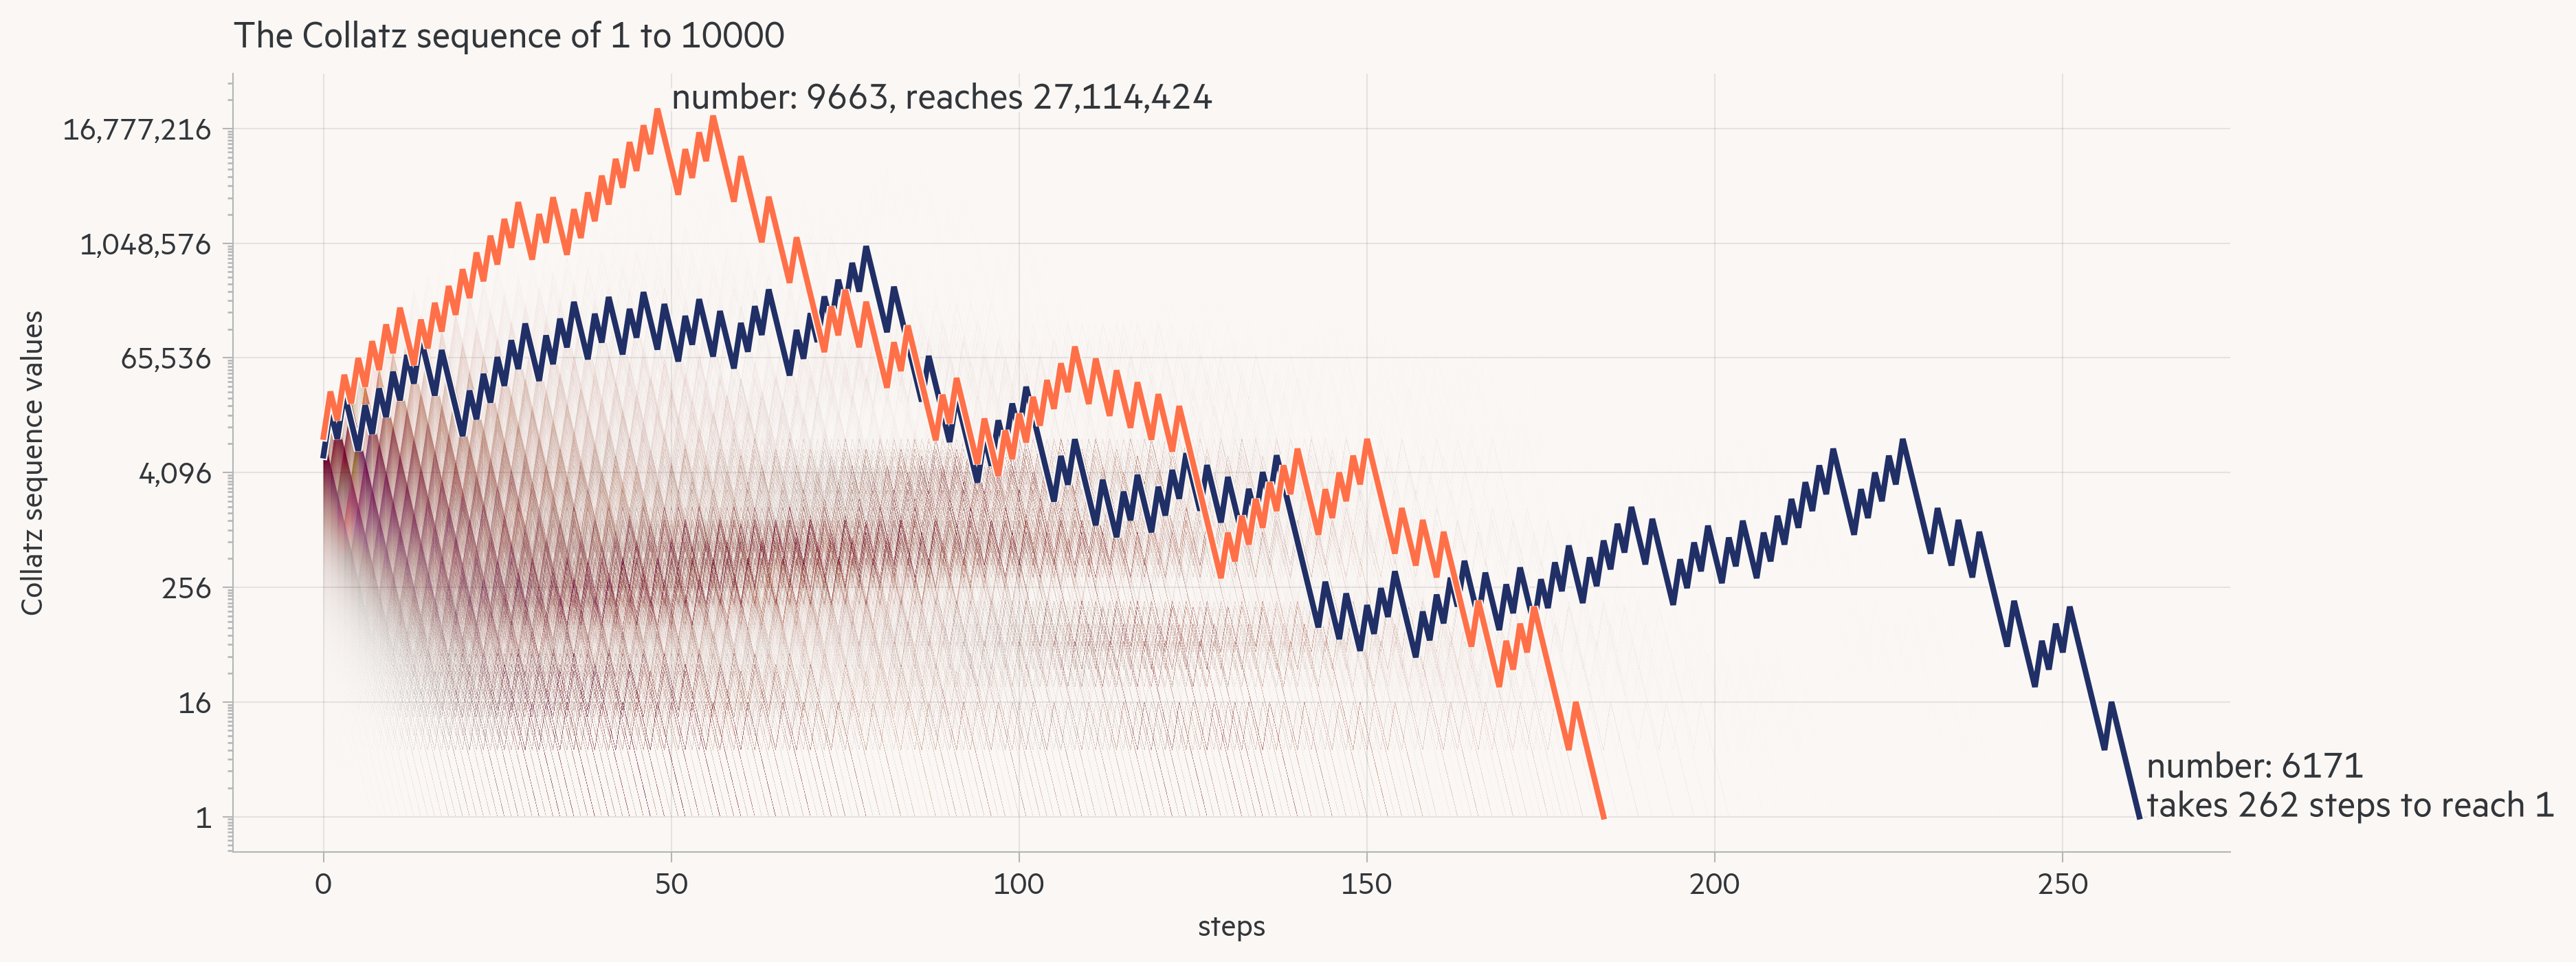

In [5]:
lw = np.clip(100/to_n, a_max=0.1, a_min=0.05)
n_colors = 16

for k, v in hist.items():
    plt.plot(range(len(v)), v, lw=lw, alpha=0.01, color=sns.palettes.color_palette('plasma', n_colors)[k%n_colors])

plw = 3
plt.plot(range(len(hist[longest_step_num])), hist[longest_step_num], 
         lw=2, color=_30k_main['blue'], path_effects=_30k_path_effects(linewidth=plw))

plt.plot(range(len(hist[reach_largest_num])), hist[reach_largest_num], 
         lw=2, color=_30k_main['orange'], path_effects=_30k_path_effects(linewidth=plw))

# annot


step = len(hist[longest_step_num])
plt.text(x=step, y=1, s=f"number: {longest_step_num}\ntakes {step} steps to reach 1", path_effects=_30k_path_effects())

large = np.max(hist[reach_largest_num])
large_pos = np.argmax(hist[reach_largest_num])
plt.text(x=large_pos+2, y=large, s=f"number: {reach_largest_num}, reaches {large:,}", path_effects=_30k_path_effects())

# chart elements

plt.ylabel("Collatz sequence values")
plt.xlabel("steps")
plt.title(f"The Collatz sequence of 1 to {to_n}")

plt.yscale('log', base=16)

ax = plt.gca()
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))

plt.savefig(f"./collatz_{to_n}.png", dpi=300)
plt.show()